In [1]:
%autosave 0
from __future__ import absolute_import, division, print_function

Autosave disabled


# $k$ Nearest Neighbors Classifier ($k$NN)

In [2]:
%pylab inline
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

Populating the interactive namespace from numpy and matplotlib


## Load data set

In [3]:
iris = datasets.load_iris()
X = iris.data[:, :2] # 4-dimensional data; we use only the first two dimensions
y = iris.target

In [4]:
classes = set(y)
print('Data set with {0} samples and {1} classes.'.format(len(y), len(classes)))
for cl in classes:
    n = np.count_nonzero(y == cl)
    print('Class {0} occurs {1} times.'.format(cl, n))

Data set with 150 samples and 3 classes.
Class 0 occurs 50 times.
Class 1 occurs 50 times.
Class 2 occurs 50 times.


## Initialize classifier

In [5]:
k = 1

In [6]:
clf = neighbors.KNeighborsClassifier(k, weights='uniform')
clf.fit(X, y);

## Classify all points in the 2-dimensional feature space

In [7]:
stepsize = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max + stepsize, stepsize), np.arange(y_min, y_max + stepsize, stepsize))
data = np.c_[xx.ravel(), yy.ravel()]

In [8]:
Z = clf.predict(data)
Z = Z.reshape(xx.shape)

## Visualization

In [9]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

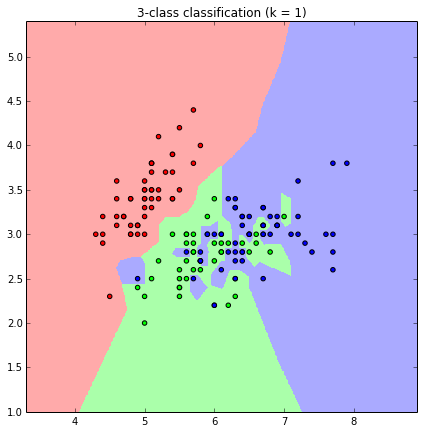

In [10]:
figure(figsize(7,7))
pcolormesh(xx, yy, Z, cmap=cmap_light)

# plot the training samples, too
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(x_min, x_max), plt.ylim(y_min, y_max)
plt.title("3-class classification (k = {0})".format(k));

### Question

There are some blue training samples located in the area of the green class. How can training samples be misclassified if the number of neighbors $k$ is set to 1? 

## Remove samples with the same $x_1$ and $x_2$ coordinate

In [11]:
unique_list = list()
X2 = []
y2 = []
for x1, x2, cl in zip(X[:,0], X[:,1], y):
    x1 = int(x1 * 10 + .5) / 10
    x2 = int(x2 * 10 + .5) / 10
    h = x1 + 1j * x2
    if not h in unique_list:
        unique_list.append(h)
        X2.append([x1, x2])
        y2.append(cl)
X = np.array(X2)
y = np.array(y2)

In [12]:
classes = set(y)
print('Data set with {0} samples and {1} classes.'.format(len(y), len(classes)))
for cl in classes:
    n = np.count_nonzero(y == cl)
    print('Class {0} occurs {1} times.'.format(cl, n))

Data set with 116 samples and 3 classes.
Class 0 occurs 38 times.
Class 1 occurs 44 times.
Class 2 occurs 34 times.


## Visualization of the classification result for varying numbers of neighbors

In [13]:
def kNN_classifier(k, X, y, data, shape):
    clf = neighbors.KNeighborsClassifier(k, weights='uniform')
    clf.fit(X, y);
    return clf.predict(data).reshape(shape)

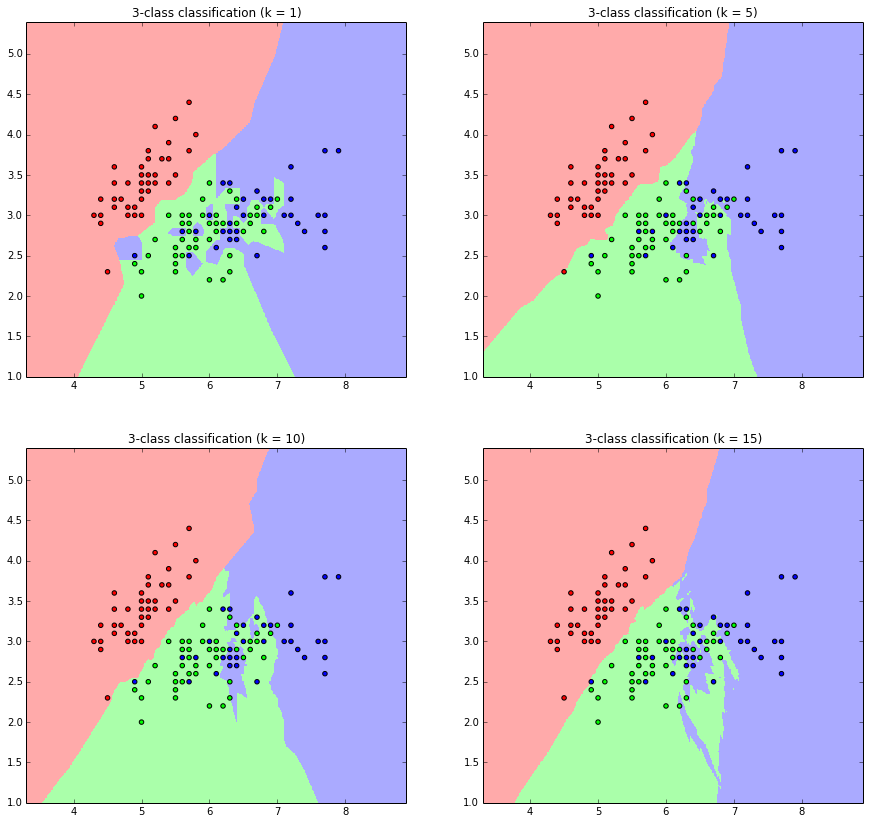

In [14]:
number_of_neighbors = [1, 5, 10, 15]
n = int(len(number_of_neighbors) / 2 + 0.5)
figure(figsize(15, 7 * n))
for i, k in enumerate(number_of_neighbors):
    plt.subplot(n, 2, i + 1)
    Z = kNN_classifier(k, X, y, data, xx.shape)
    pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # plot the training samples, too
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(x_min, x_max), plt.ylim(y_min, y_max)
    plt.title("3-class classification (k = {0})".format(k));